<a href="https://colab.research.google.com/github/AbhyanandSharma2005/ML-model-practice-on-real-data/blob/main/SVM%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Generating Synthetic Data ---
Dataset shape: X=(200, 2), y=(200,)
Class distribution (-1/1): 100/100
Training samples: 150, Test samples: 50
Training class distribution (-1/1): 75/75
Test class distribution (-1/1): 25/25

Features scaled successfully.

--- Training SVM Model ---
Iteration 0/1000: Cost = 5355.154120
Iteration 100/1000: Cost = 6.186878
Iteration 200/1000: Cost = 6.631916
Iteration 300/1000: Cost = 6.606625
Iteration 400/1000: Cost = 6.577338
Iteration 500/1000: Cost = 6.659900
Iteration 600/1000: Cost = 6.627235
Iteration 700/1000: Cost = 6.595848
Iteration 800/1000: Cost = 6.578185
Iteration 900/1000: Cost = 6.545468
SVM training complete.

--- Evaluating Model Performance ---
Accuracy on test set: 1.0000

Classification Report:
               precision    recall  f1-score   support

    Class -1       1.00      1.00      1.00        25
     Class 1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.0

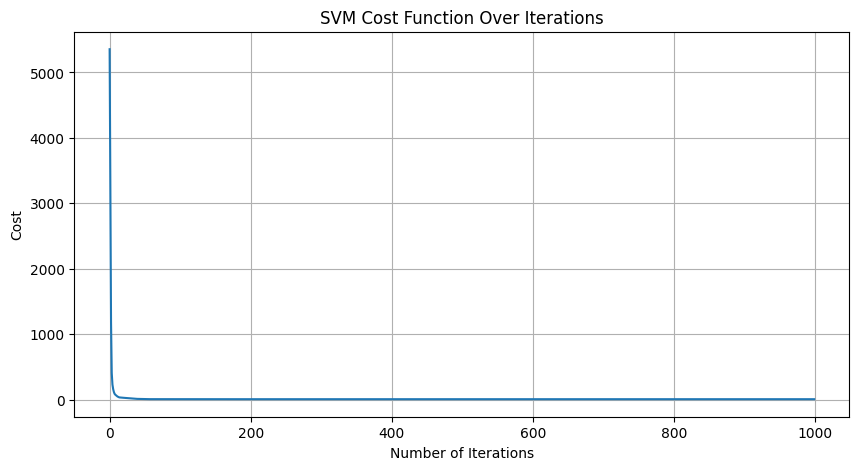

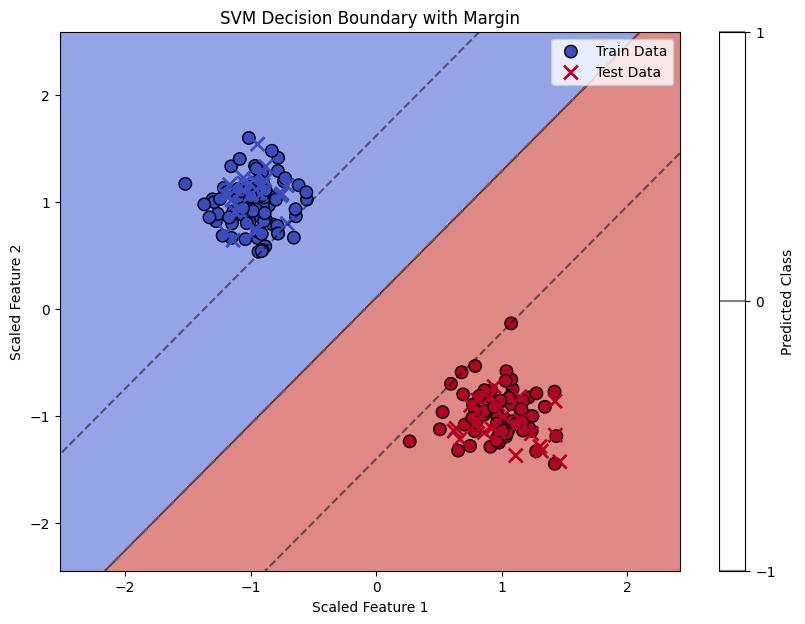

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_blobs # For generating synthetic data

# --- 1. SVM Model Implementation (From Scratch) ---

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iterations=1000):
        """
        Initializes the Linear SVM model.

        Args:
            learning_rate (float): Step size for gradient descent.
            lambda_param (float): Regularization parameter (controls inverse of C).
                                 Larger lambda means stronger regularization.
            n_iterations (int): Number of iterations for gradient descent.
        """
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.costs = [] # To store cost at each iteration

    def fit(self, X, y):
        """
        Trains the Linear SVM model using gradient descent.

        Args:
            X (numpy.ndarray): Training features, shape (n_samples, n_features).
            y (numpy.ndarray): Target labels, shape (n_samples,).
                                Labels must be -1 or 1.
        """
        n_samples, n_features = X.shape

        # Ensure labels are -1 or 1 (important for hinge loss calculation)
        y_ = np.where(y <= 0, -1, 1)

        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for i in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) + self.bias) >= 1

                if condition:
                    # Point is correctly classified and outside the margin
                    # Only regularization term contributes to gradient
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                    # Bias remains unchanged
                else:
                    # Point is misclassified or within the margin
                    # Both regularization and hinge loss contribute
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y_[idx]))
                    self.bias -= self.learning_rate * (-y_[idx])

            # Calculate and store the cost (optional, for monitoring)
            cost = self._compute_cost(X, y_)
            self.costs.append(cost)

            if i % (self.n_iterations // 10) == 0:
                print(f"Iteration {i}/{self.n_iterations}: Cost = {cost:.6f}")

    def _compute_cost(self, X, y_):
        """
        Computes the SVM cost function (hinge loss + regularization).
        J(w, b) = 1/2 * ||w||^2 + C * sum(max(0, 1 - y_i * (w^T x_i + b)))
        Here, C = 1 / (2 * lambda_param)
        """
        C = 1 / (2 * self.lambda_param) # C is inverse of 2*lambda_param in this formulation

        hinge_loss = 0
        for idx, x_i in enumerate(X):
            hinge_loss += max(0, 1 - y_[idx] * (np.dot(x_i, self.weights) + self.bias))

        cost = 0.5 * np.dot(self.weights, self.weights) + C * hinge_loss
        return cost

    def predict(self, X):
        """
        Predicts class labels for new samples.
        Sign of (w^T x + b) determines the class.
        """
        approx = np.dot(X, self.weights) + self.bias
        return np.sign(approx) # Returns -1 or 1

# --- 2. Data Generation ---

def generate_synthetic_data(n_samples=200, n_features=2, centers=2, cluster_std=1.0, random_state=42):
    """
    Generates a simple 2-feature, 2-class synthetic dataset.
    """
    X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers,
                      cluster_std=cluster_std, random_state=random_state)
    # Ensure labels are -1 and 1 for SVM
    y = np.where(y == 0, -1, 1)
    return X, y

# --- 3. Main Execution Block ---

if __name__ == "__main__":
    # --- A. Generate and Prepare Data ---
    print("--- Generating Synthetic Data ---")
    X, y = generate_synthetic_data(n_samples=200, n_features=2, cluster_std=0.8, random_state=42)

    print(f"Dataset shape: X={X.shape}, y={y.shape}")
    print(f"Class distribution (-1/1): {np.sum(y == -1)}/{np.sum(y == 1)}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
    print(f"Training class distribution (-1/1): {np.sum(y_train == -1)}/{np.sum(y_train == 1)}")
    print(f"Test class distribution (-1/1): {np.sum(y_test == -1)}/{np.sum(y_test == 1)}")

    # Feature Scaling (Crucial for SVM with Gradient Descent)
    # StandardScaler transforms data to have a mean of 0 and a standard deviation of 1.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("\nFeatures scaled successfully.")

    # --- B. Initialize and Train the Model ---
    print("\n--- Training SVM Model ---")
    # Experiment with learning_rate, lambda_param, n_iterations
    svm_model = SVM(learning_rate=0.001, lambda_param=0.01, n_iterations=1000)
    svm_model.fit(X_train_scaled, y_train)
    print("SVM training complete.")

    # --- C. Evaluate the Model ---
    print("\n--- Evaluating Model Performance ---")
    y_pred = svm_model.predict(X_test_scaled)

    # Convert y_test to 0/1 for scikit-learn metrics if necessary, or ensure y_pred is -1/1
    # For consistency with classification_report, we'll convert predictions to 0/1 if they are -1/1
    # and original y_test values were 0/1. Our current `make_blobs` and `y = np.where` set them to -1/1.
    # So, no conversion needed here if using -1/1 for everything.
    # If your original data has 0/1, convert y_pred for metrics:
    # y_pred_for_metrics = np.where(y_pred == -1, 0, 1)
    # y_test_for_metrics = np.where(y_test == -1, 0, 1)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")

    # Classification report typically expects 0/1 labels. If your y_test and y_pred are -1/1,
    # it might still work, but 0/1 is more standard for the report labels.
    # Let's ensure labels are 0 and 1 for classification_report clarity
    y_test_01 = np.where(y_test == -1, 0, 1)
    y_pred_01 = np.where(y_pred == -1, 0, 1)
    print("\nClassification Report:\n", classification_report(y_test_01, y_pred_01, target_names=['Class -1', 'Class 1']))

    # --- D. Visualization (for 2D data) ---
    print("\n--- Plotting Decision Boundary ---")

    # Plot Cost vs. Iterations
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(svm_model.costs)), svm_model.costs)
    plt.title('SVM Cost Function Over Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

    # Plot the decision boundary
    plt.figure(figsize=(10, 7))
    ax = plt.gca()

    # Create a meshgrid for plotting decision boundary
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Get hyperplane equation: w1*x + w2*y + b = 0 => y = (-w1*x - b) / w2
    # For decision boundary, we predict on the meshgrid
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision regions
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)

    # Plot the training points
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=80, label='Train Data')

    # Plot the test points
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=100, linewidth=2, label='Test Data')

    # Plot the hyperplane (decision boundary) and margins
    # w_x * x + w_y * y + b = 0  (hyperplane)
    # w_x * x + w_y * y + b = 1  (positive margin)
    # w_x * x + w_y * y + b = -1 (negative margin)

    # x_vals = np.array(ax.get_xlim())
    # y_vals = (-svm_model.weights[0] * x_vals - svm_model.bias) / svm_model.weights[1]
    # ax.plot(x_vals, y_vals, 'k--', label='Hyperplane')

    # # Plot margin lines
    # y_vals_plus = (-svm_model.weights[0] * x_vals - svm_model.bias + 1) / svm_model.weights[1]
    # y_vals_minus = (-svm_model.weights[0] * x_vals - svm_model.bias - 1) / svm_model.weights[1]
    # ax.plot(x_vals, y_vals_plus, 'k:', label='Margin')
    # ax.plot(x_vals, y_vals_minus, 'k:')

    # Alternative way to plot hyperplane using contour, often cleaner
    # plot the decision function for the hyperplane
    Z_hyperplane = np.dot(np.c_[xx.ravel(), yy.ravel()], svm_model.weights) + svm_model.bias
    Z_hyperplane = Z_hyperplane.reshape(xx.shape)
    plt.contour(xx, yy, Z_hyperplane, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    plt.title('SVM Decision Boundary with Margin')
    plt.xlabel('Scaled Feature 1')
    plt.ylabel('Scaled Feature 2')
    plt.colorbar(label='Predicted Class')
    plt.legend()
    plt.show()